In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

import env
import k_wrangle

In [2]:
df = k_wrangle.get_curriculum_logs()
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [3]:
df = k_wrangle.prep_curriculum_data()
df.head()

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Java Full Stack Web Development,Web Development


# Explore

### Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [28]:
# curriculum access value counts per program

df.program.value_counts()


Web Development    743918
Data Science       103412
Name: program, dtype: int64

In [29]:
# top 5 overall pages
print('10 Most Popular Pages in Web Dev Program & DS')

df.groupby(['program'])['endpoint'].value_counts().head(10)

10 Most Popular Pages in Web Dev Program & DS


program       endpoint                                
Data Science  /                                           8358
              search/search_index.json                    2203
              classification/overview                     1785
              1-fundamentals/modern-data-scientist.jpg    1655
              1-fundamentals/AI-ML-DL-timeline.jpg        1651
              1-fundamentals/1.1-intro-to-data-science    1633
              classification/scale_features_or_not.svg    1590
              fundamentals/AI-ML-DL-timeline.jpg          1443
              fundamentals/modern-data-scientist.jpg      1438
              sql/mysql-overview                          1424
Name: endpoint, dtype: int64

In [31]:
# remove pages that are not part of curriculum pages

df = df[df.endpoint.str.contains('jpeg') != True]

df = df[df.endpoint.str.contains('json') != True]

df = df[df.endpoint.str.contains('jpg') != True]

df = df[df.endpoint.str.contains('appendix') != True]

df = df[df.endpoint.str.contains('Appendix') != True]

df = df[df.endpoint != '/']

df = df[df.endpoint != 'toc']

In [32]:
# page views per cohort with count
page_views = df.groupby(['cohort_name'])['endpoint'].agg(['count', 'unique'])
page_views

,count,unique
cohort_name,,
Andromeda,22255,"[assets/js/pdfmake.min.js.map, html-css, html-..."
Apex,27737,"[html-css, html-css/introduction, java-i, java..."
Apollo,4,"[content/html-css, content/html-css/gitbook/im..."
Arches,7670,"[javascript-i, javascript-i/functions, javascr..."
Badlands,74,"[prework/fundamentals, prework/fundamentals/va..."
Bash,14773,"[html-css, html-css/introduction, prework/cli,..."
Bayes,20456,"[3-sql/1-mysql-overview, 2-storytelling/bad-ch..."
Betelgeuse,26128,"[html-css, spring, html-css/introduction, html..."
Ceres,35113,"[quiz, javascript-i, spring, java-i, java-iii,..."


In [33]:
# create ds dataframe
DS_df = df[(df.program == 'Data Science')]
DS_df.head(5)

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,,
2019-08-20,09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science,Data Science
2019-08-20,09:40:30,2-storytelling/bad-charts,467,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science,Data Science
2019-08-20,09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science,Data Science
2019-08-20,09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science,Data Science
2019-08-20,09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34.0,97.105.19.58,34.0,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,None,3.0,Data Science,Data Science


In [34]:
# top 5 overall pages
print('5 Most Popular Pages in Data Science Program')

DS_df.endpoint.value_counts().head(5)

5 Most Popular Pages in Data Science Program


classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
Name: endpoint, dtype: int64

Text(0, 0.5, 'Page Visits')

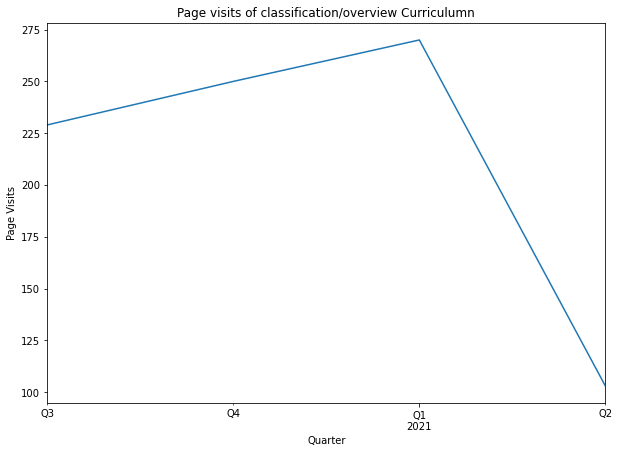

In [52]:
# plot data for top visited page 
plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'classification/overview'].endpoint.resample('Q').count().plot()
plt.title('Page visits of classification/overview')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

Text(0, 0.5, 'Page Visits')

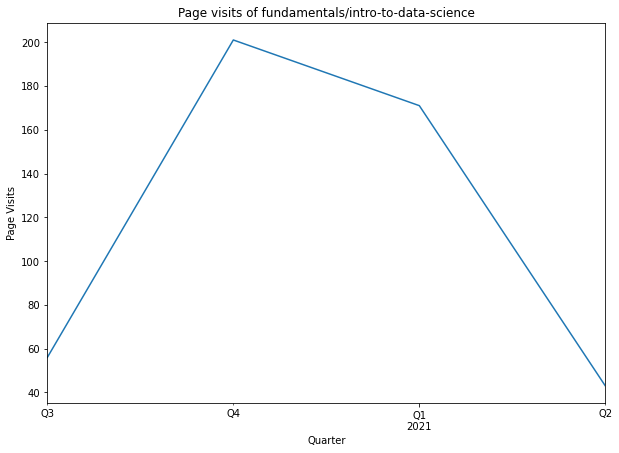

In [54]:
# plot data for lowest of top 5 visited page
plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'fundamentals/intro-to-data-science'].endpoint.resample('Q').count().plot()
plt.title('Page visits of fundamentals/intro-to-data-science')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

In [35]:
# create Web dev df
Wb_df = df[(df.program == 'Web Development')]
Wb_df.head(5)

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program
date,,,,,,,,,,,,,,,,
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Java Full Stack Web Development,Web Development
2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Java Full Stack Web Development,Web Development


In [36]:
# top 5 overall pages
print('5 Most Popular Pages in Web Development Program')

Wb_df.endpoint.value_counts().head(5)

5 Most Popular Pages in Web Development Program


javascript-i    18193
java-iii        13162
html-css        13111
java-ii         12173
spring          11877
Name: endpoint, dtype: int64

Text(0, 0.5, 'Page Visits')

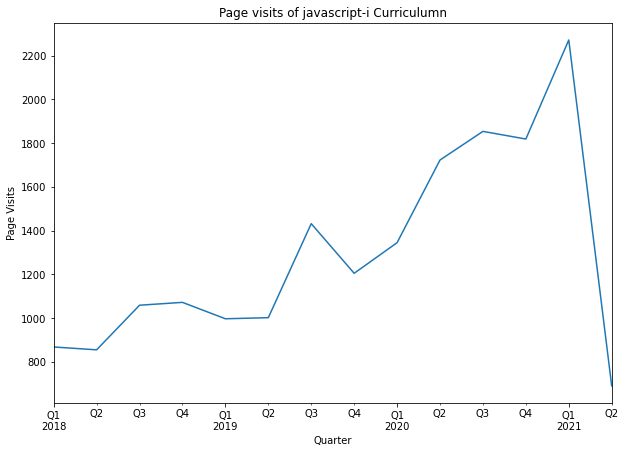

In [53]:
# plot data for top visited page 

plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'javascript-i'].endpoint.resample('Q').count().plot()
plt.title('Page visits of javascript-i')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

Text(0, 0.5, 'Page Visits')

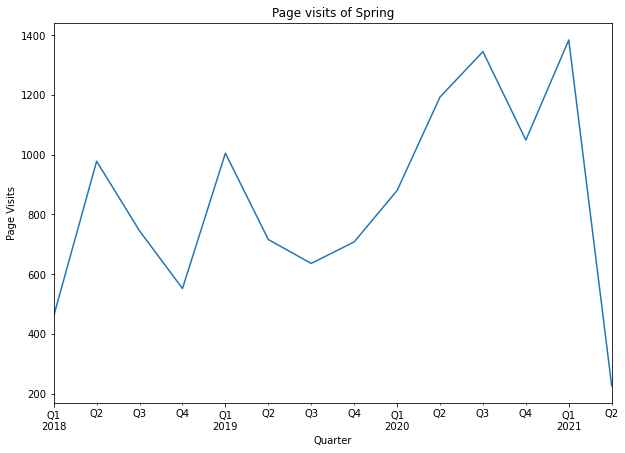

In [55]:
# plot data for lowest of top 5 visited page

plt.figure(figsize=(10,7))
Wb_df[Wb_df.endpoint == 'spring'].endpoint.resample('Q').count().plot()
plt.title('Page visits of Spring')
plt.xlabel('Quarter')
plt.ylabel('Page Visits')

### Takeaways
- For Data Science Program these are the top 5 pages with the most traffic:
    - classification/overview                    | count: 1785
    - 1-fundamentals/1.1-intro-to-data-science   | count: 1633
    - classification/scale_features_or_not.svg   | count: 1590
    - sql/mysql-overview                         | count: 1424
    - fundamentals/intro-to-data-science         | count: 1413
    
- For Web Development these are the top 5 pages with the most traffic:
    - javascript-i    | count: 18193
    - java-iii        | count: 13162
    - html-css        | count: 13111
    - java-ii         | count: 12173
    - spring          | count: 11877

In [37]:
subset = df[(df.endpoint != '/') & (df.cohort_name != 'Staff') & (df.program != 'none')]


In [38]:
subset[['base', 'endpoint']] = subset.endpoint.str.split(pat='/', n=1, expand=True)


In [39]:
subset.base = subset.base.str.lstrip('0123456789.- ')
subset.head()

,time,endpoint,user_id,cohort_id,ip_address,id,cohort_name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,program_name,program,base
date,,,,,,,,,,,,,,,,,
2018-01-26,09:56:02,None,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development,java-ii
2018-01-26,09:56:05,object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development,java-ii
2018-01-26,09:56:06,object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0,PHP Full Stack Web Development,Web Development,slides
2018-01-26,09:56:24,conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Java Full Stack Web Development,Web Development,javascript-i
2018-01-26,09:56:41,loops,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0,Java Full Stack Web Development,Web Development,javascript-i


In [40]:
ds_curr = subset[subset.program =='Web Development'].base.value_counts().sort_values(ascending=False).to_frame()
ds_curr.head(10)

,base
javascript-i,107525
html-css,76142
mysql,73732
jquery,54073
java-iii,49810
spring,48825
java-ii,48698
java-i,37067
javascript-ii,34823
examples,12279


In [41]:
ds_curr = subset[subset.program =='Data Science'].base.value_counts().sort_values(ascending=False).to_frame()
ds_curr.head(10)

,base
sql,13670
classification,11268
python,10455
fundamentals,8979
regression,7471
stats,6660
clustering,3635
timeseries,3315
nlp,3208
storytelling,2961


### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [42]:
# least referred to lessons across all cohorts for Web Development program

ds_curr = subset[subset.program =='Web Development'].base.value_counts().sort_values(ascending=True).to_frame()
ds_curr.head(60)

,base
ajax-api-request.html,1
_Intro_Stats,1
_Prototype,1
ds,1
javascript-functions,1
_NLP,1
capsones,1
strings,1
_MissingVals,1
mini_exercises,1


In [43]:
# least referred to lessons across all cohorts for Data Science program

ds_curr = subset[subset.program =='Data Science'].base.value_counts().sort_values(ascending=True).to_frame()
ds_curr.head(60)

,base
itc%20-%20ml,1
where,1
Index.html,1
End_to_End_clustering,1
stats-assessment,1
evaluate,1
end_to_end_clustering,1
itc-ml,1
group-by,1
sql.mysql-overview,1


In [44]:
# cohort Andromeda
ds_curr = subset[subset.cohort_name =='Andromeda'].base.value_counts().sort_values(ascending=True).to_frame()
ds_curr.head(60)

,base
documentation,1
sql,1
sessions-and-cookies,1
quiz,1
tools,1
html,1
testing-user-functions,1
htmle-css,1
capstone,1
bonus-exercises,1


In [45]:
# Cohort Apex
ds_curr = subset[subset.cohort_name =='Apex'].base.value_counts().sort_values(ascending=True).to_frame()
ds_curr.head(60)

,base
capstone-workbook,1
interfaces-and-abstract-classes,1
forms,1
tools,2
user-input,2
css-i,3
setup,3
passwords,3
finish-the-adlister,8
elements,23


### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [46]:
df.user_id.nunique()


966

In [47]:
df.user_id.value_counts()

64     13517
11     13123
53     11466
314     7083
1       5600
       ...  
593        1
857        1
212        1
461        1
348        1
Name: user_id, Length: 966, dtype: int64

In [48]:
page_views = df.groupby(['user_id'])['endpoint'].agg(['count', 'unique'])
page_views

,count,unique
user_id,,
1,5600,"[java-ii, java-ii/object-oriented-programming,..."
2,1382,"[javascript-i/conditionals, javascript-i/loops..."
3,1390,"[javascript-i/conditionals, javascript-i/funct..."
4,605,"[javascript-i/functions, javascript-i/introduc..."
5,1493,"[javascript-i/javascript-with-html, javascript..."
...,...,...
976,26,"[javascript-i, javascript-i/javascript-with-ht..."
977,83,"[javascript-i, javascript-i/javascript-with-ht..."
978,32,"[javascript-i, javascript-i/introduction, java..."
